# Variational Autoencoder - Dimensions of z
___
* see training - loss etc
* compare x and x_dach
* z = 64 dim
* record: noframeskip

In [139]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython import display
import json
from scipy.stats import norm
import statistics

In [58]:
from pathlib import Path
path = str(Path(os.getcwd()).parent.parent)

import sys
sys.path.insert(0,path)

from breakout.vae.vae import ConvVAE

In [135]:
path = '/home/dakaun/Dropbox/MA/worldmodel/worldmodel-breakout-server-version-v3/200430'
obs_path = '/home/dakaun/Dropbox/MA/worldmodel/worldmodel-breakout-server-version-v3/200423/record_noframeskip'
LATENT_DIM = 64
vae_path = path +'/tf_vae'
trainparam_path = path + '/tf_vae/vae_train_param.json'
batch_size=1000

In [60]:
def load_raw_data_list(filelist):
    data_list = []
    action_list = []
    counter = 0
    for i in range(len(filelist)):
        filename = filelist[i]
        raw_data = np.load(os.path.join(obs_path, filename))
        data_list.append(raw_data['obs'])
        action_list.append(raw_data['action'])
        if ((i+1) % 1000 == 0):
            print("loading file", (i+1))
    return data_list, action_list

In [61]:
filelist = os.listdir(obs_path)[:100]
dataset, action_dataset = load_raw_data_list(filelist[0:10])
dataset[0].shape

(1000, 64, 64, 3)

In [136]:
vae = ConvVAE(z_size=64,
              batch_size=batch_size,
              learning_rate=0.0001,
              kl_tolerance=0.5,
              is_training=False,
              reuse=False,
              gpu_mode=True)
vae.load_json(os.path.join(vae_path,'vae.json'))

obs = dataset[5]
z = vae.encode(obs) 
z_dec = vae.decode(z)

INFO:tensorflow:Model using gpu.


### Sample z from normal distribution

In [63]:
vae = ConvVAE(z_size=64,
              batch_size=16,
              learning_rate=0.0001,
              kl_tolerance=0.5,
              is_training=False,
              reuse=False,
              gpu_mode=True)
vae.load_json(os.path.join(vae_path,'vae.json'))

INFO:tensorflow:Model using gpu.


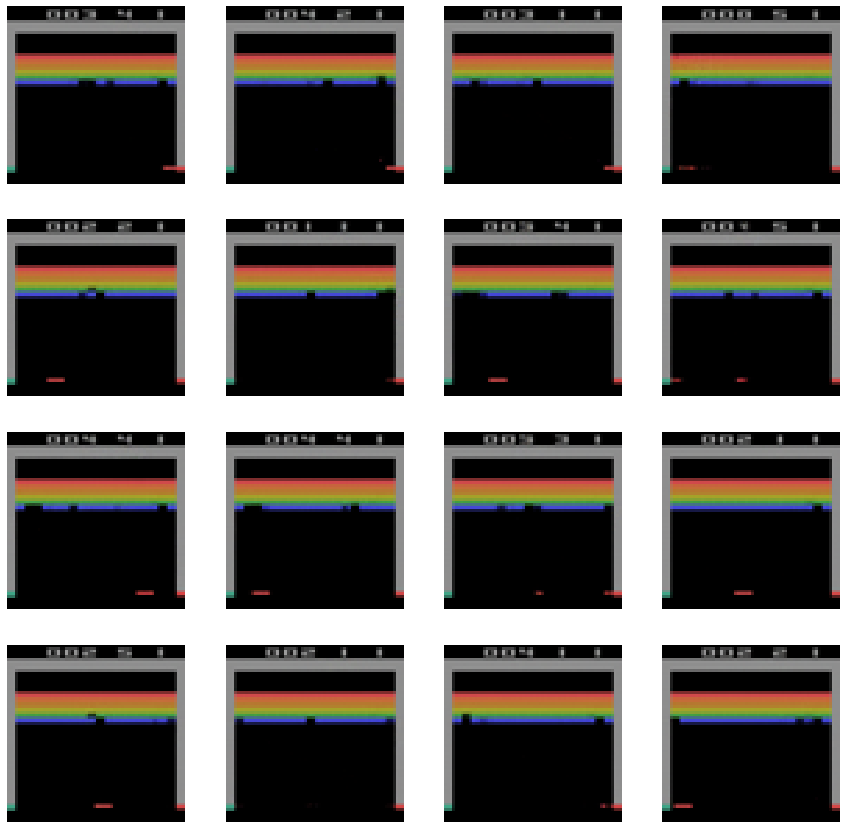

In [64]:
# z from normal distrib
num_examples_to_generate = 16
random_vec_for_generation = np.random.normal(size=(num_examples_to_generate, LATENT_DIM)) 
#tf.random_normal(shape=(num_examples_to_generate, LATENT_DIM))
z_dec = vae.decode(random_vec_for_generation)
fig = plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(z_dec[i, :, :, :])
    plt.axis('off')
plt.show()

In [65]:
random_vec_for_generation.shape

(16, 64)

In [77]:
len(np.where(abs(random_vec_for_generation[0])>0.1)[0])

56

only pos dim

In [ ]:
pos_random_vec_for_generation = np.maximum(0,random_vec_for_generation)

In [ ]:
pos_random_vec_for_generation

In [ ]:
ymax = max([max(item) for item in pos_random_vec_for_generation])
ymax

In [ ]:
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.ylim(1.0,ymax)
    plt.plot(pos_random_vec_for_generation[i].reshape(64))

In [ ]:
relevant_index = []

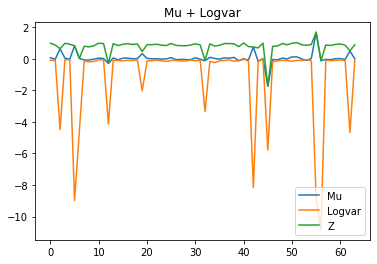

[ 1  2  5  6  7  8  9 12 14 15 19 20 21 23 24 25 26 27 28 30 32 33 34 35
 38 39 41 42 43 45 46 47 49 50 52 54 55 56 58 62 63]
41


In [74]:
obs = dataset[5]
mu, logvar = vae.encode_mu_logvar(obs)
z = mu + np.exp(logvar)
mu.shape
plt.title('Mu + Logvar')
plt.plot(mu[0], label='Mu')
plt.plot(logvar[0], label = 'Logvar')
plt.plot(z[0], label = 'Z')
plt.legend(loc='lower right')
plt.show()
info_var = np.where(abs(logvar[0])>0.1)
print(info_var[0])
print(len(info_var[0]))

In [134]:
obs.shape

(1000, 64, 64, 3)

In [187]:
z_test = vae.encode(obs)
z_test_dec = vae.decode(z_test)
z_test.shape

(1000, 64)

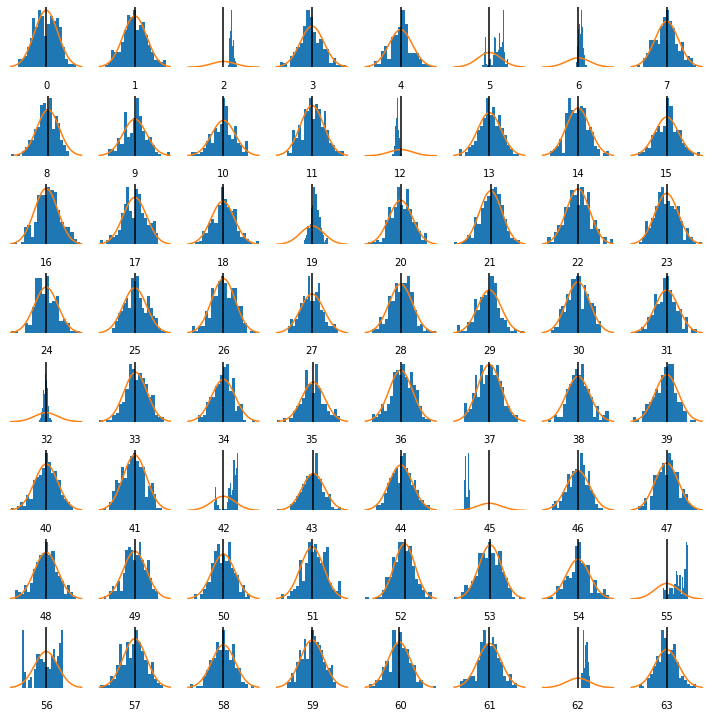

In [156]:
from scipy.stats import norm

z_testpart1 = z_test[:200,]

x = np.linspace(-3, 3, 300)

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.hist(z_testpart1[:,i], density=True, bins = 20)
    ax.axis('off')
    ax.text(0.5, -0.35, str(i), fontsize=10, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))
    ax.axvline(0, c="black")
plt.tight_layout()
plt.show()

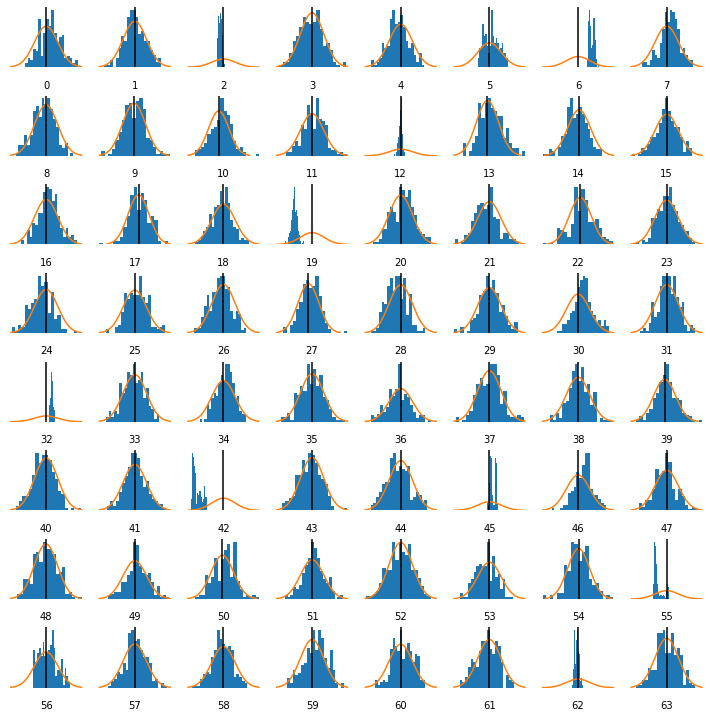

In [157]:
z_testpart_1 = z_test[-200:,]

x = np.linspace(-3, 3, 300)

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.hist(z_testpart_1[:,i], density=True, bins = 20)
    ax.axis('off')
    ax.text(0.5, -0.35, str(i), fontsize=10, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))
    ax.axvline(0, c="black")
plt.tight_layout()
plt.show()

Dim 2

In [158]:
print(min(z_testpart1[:,2]))
print(max(z_testpart1[:,2]))
print(statistics.mean(z_testpart1[:,2]))
print('\n')
print(min(z_testpart_1[:,2]))
print(max(z_testpart_1[:,2]))
print(statistics.mean(z_testpart_1[:,2]))

0.36530483
1.1166253
0.69685155


-0.53870577
0.1020333
-0.26469225


In [176]:
z_dim2part1 = []
for i, zs in enumerate(z_testpart1):
    if (zs[2]> 0.65 and zs[2]< 0.75):
        z_dim2part1.append(i)
len(z_dim2part1)
z_dim2part1[:10]

[0, 2, 5, 6, 9, 12, 14, 16, 28, 29]

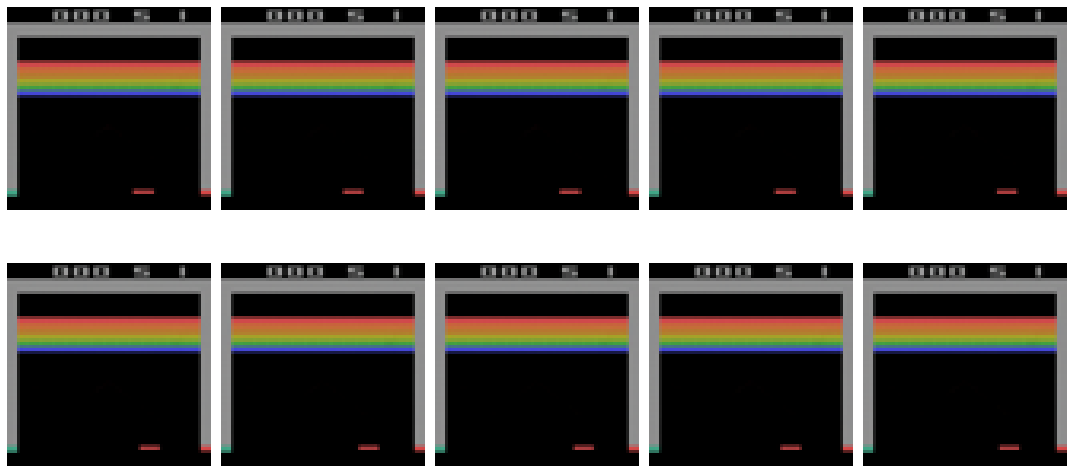

In [168]:
z_dim2part1[:10]

fig = plt.figure(figsize=(15,8))
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(z_test_dec[z_dim2part1[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [178]:
z_dim2part_1 = []
for i, zs in enumerate(z_testpart_1):
    if (zs[2]> -0.3 and zs[2]< -0.2):
        z_dim2part_1.append(i)
len(z_dim2part_1)
z_dim2part_1[:10]

[13, 14, 17, 18, 19, 22, 24, 30, 32, 33]

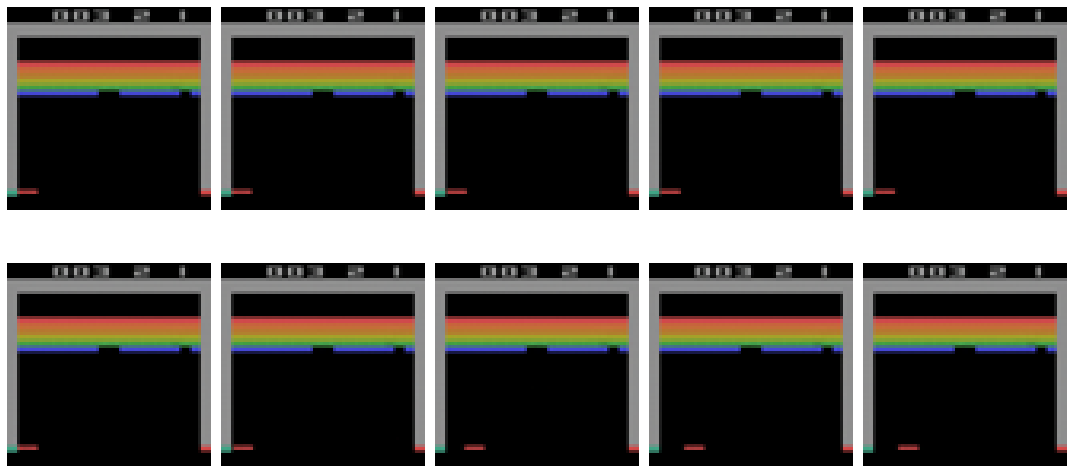

In [188]:
z_dim2part_1[:10]
z_test_decpart_1 = z_test_dec[-200:,]

fig = plt.figure(figsize=(15,8))
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(z_test_decpart_1[z_dim2part_1[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

Dim 45

In [180]:
print(min(z_testpart1[:,45]))
print(max(z_testpart1[:,45]))
print(statistics.mean(z_testpart1[:,45]))
print('\n')
print(min(z_testpart_1[:,45]))
print(max(z_testpart_1[:,45]))
print(statistics.mean(z_testpart_1[:,45]))

-2.183032
-1.6502455
-1.9112972


-0.17378199
0.6979953
0.3204487


In [183]:
z_dim45part1 = []
for i, zs in enumerate(z_testpart1):
    if (zs[45]> -1.7 and zs[45]< -1.6):
        z_dim45part1.append(i)
len(z_dim45part1)
z_dim45part1[:10]

[5, 11, 15, 17, 19, 21, 30, 34, 35, 39]

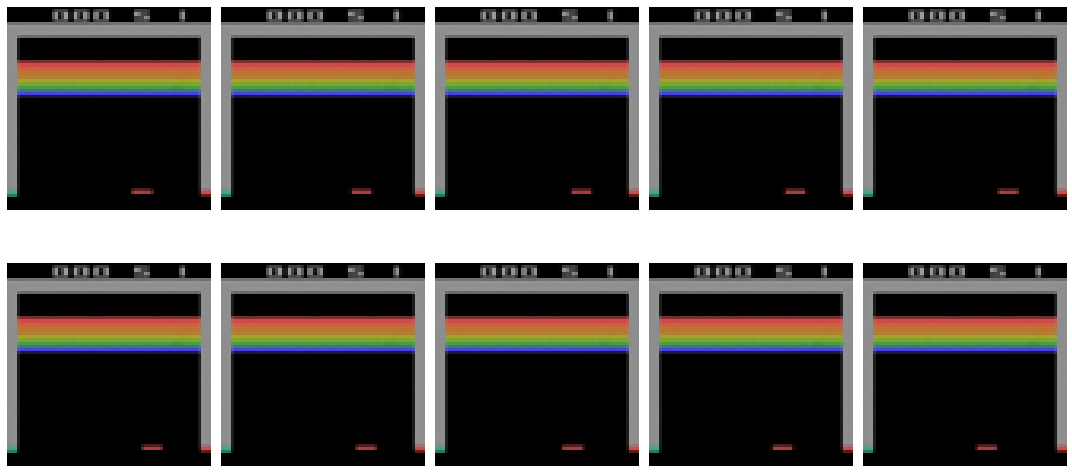

In [189]:
z_dim45part1[:10]

fig = plt.figure(figsize=(15,8))
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(z_test_dec[z_dim45part1[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [185]:
z_dim45part_1 = []
for i, zs in enumerate(z_testpart_1):
    if (zs[45]> 0.6 and zs[45]< 0.75):
        z_dim45part_1.append(i)
len(z_dim45part_1)
z_dim45part_1[:10]

[107, 110, 117, 140, 141, 142, 144, 153, 163, 172]

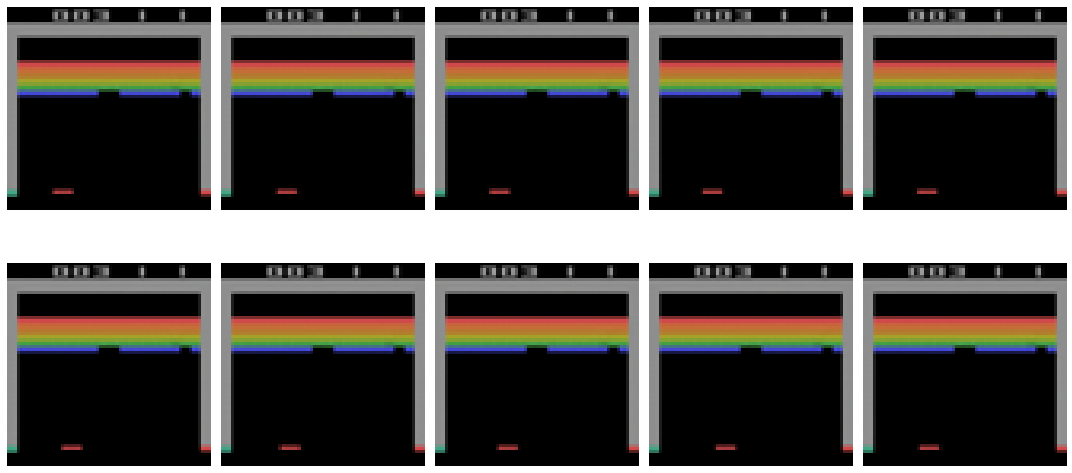

In [190]:
z_dim45part_1[:10]
z_test_decpart_1 = z_test_dec[-200:,]

fig = plt.figure(figsize=(15,8))
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(z_test_decpart_1[z_dim45part_1[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()